# Assignment 1/D
**Disclaimer: Only for ADL/AML students!**

### General information
**You have to solve all tasks to pass!** 

Grade is calculated by the day of the last submission, but you will only get it after you've succesfully presented it. 

**Deadlines and grades:** 
  * 2020.09.20 - 2020.10.20 ==> 5
  * 2020.10.21 - 2020.10.27 ==> 4
  * 2020.10.28 - 2020.11.03 ==> 3
  * 2020.11.04 - 2020.11.10 ==> 2
  * 2020.11.11 or later ==> 1 

You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, sklearn, skimage, tensorflow`.

### Description
In this assignment you have to build a reconstruction loss based anomaly detection model using tf.keras. You have to train an autoencoder to reconstruct Homer Simpson images, then use the trained model to classify Simpson and Flower images. To implement such kind of models, you should take a look at the following classes and methods: `Sequential model, Funcitonal API, MaxPooling2D, Conv2DTranspose`.


## Prepare dataset

### Simpsons
* Download the Simpsons Characters dataset. Here you can find more information about the dataset: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
* After extracting it, select only those images, on which Homer Simpson is present.
* Resize all image to be 64x64.
* Then split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images and their corresponding masks.
* Normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

### Flowers
* Download the Flowes Recognition dataset. Here you can find more information about the dataset: https://www.kaggle.com/alxmamaev/flowers-recognition
* After extracting it, resize all image to be 64x64.
* Print the size of each set and plot 5 training images and their corresponding masks.
* And finally normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

In [1]:
# Simpsons characters
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" -o simpsons_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103    0  3103    0     0   2746      0 --:--:--  0:00:01 --:--:--  2746


In [2]:
!unzip simpsons_dataset.zip

Archive:  simpsons_dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of simpsons_dataset.zip or
        simpsons_dataset.zip.zip, and cannot find simpsons_dataset.zip.ZIP, period.


In [3]:
# Flowers Recgonition
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" -o flowers-recognition.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3110    0  3110    0     0   2817      0 --:--:--  0:00:01 --:--:--  2817


In [4]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of flowers-recognition.zip or
        flowers-recognition.zip.zip, and cannot find flowers-recognition.zip.ZIP, period.


In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas
import skimage
import sklearn
from sklearn.model_selection import train_test_split
import glob
import os

In [6]:
# Read images, convert to RGB and resize
homer_path = 'simpsons_dataset/homer_simpson'
homer_images = [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 
                  for img_path in glob.glob("{}/*.jpg".format(homer_path))]
homer_images = np.array([cv2.resize(img, (64, 64)) for img in homer_images])

In [7]:
# Split into train, validation and test sets
train_dataset, test_dataset = train_test_split(homer_images, test_size=0.20, shuffle=False)
train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.25, shuffle=False)


Size of train dataset: (1347, 64, 64, 3)
Image examples of train dataset...


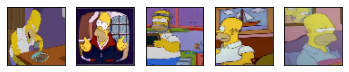


Size of validation dataset: (449, 64, 64, 3)
Image examples of validation dataset...


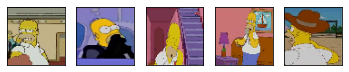


Size of test dataset: (450, 64, 64, 3)
Image examples of test dataset...


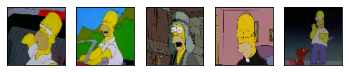

In [8]:
# Print size and examples of each dataset
datasets_with_names = [("train", train_dataset), 
                       ("validation", val_dataset),
                       ("test", test_dataset)]
for name_dataset, dataset in datasets_with_names:
  print("\nSize of {} dataset:".format(name_dataset), dataset.shape)
  print("Image examples of {} dataset...".format(name_dataset))
  fig, ax = plt.subplots(1,5)
  for i, ax in enumerate(ax.flatten()):
    ax.imshow(dataset[i])
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
  plt.show()

In [9]:
# Normalization
train_dataset = train_dataset / 255.
val_dataset = val_dataset / 255.
test_dataset = test_dataset / 255.

In [10]:
# Read images, convert to RGB and resize
flowers_path = 'flowers'
flowers_dataset = []
for flower_type in os.listdir(flowers_path):
  flower_type_path = os.path.join(flowers_path, flower_type)
  flowers_dataset += [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 
                  for img_path in glob.glob("{}/*.jpg".format(flower_type_path))]
flowers_dataset = np.array([cv2.resize(img, (64, 64)) for img in flowers_dataset])

Size of flowers dataset: (4323, 64, 64, 3)
Image examples of flowers dataset...


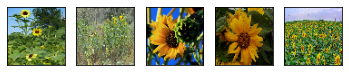

In [11]:
# Print size and examples of flowers dataset
print("Size of flowers dataset:", flowers_dataset.shape)
print("Image examples of flowers dataset...")
fig, ax = plt.subplots(1,5)
for i, ax in enumerate(ax.flatten()):
  ax.imshow(flowers_dataset[i])
  ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

In [12]:
# Normalization
flowers_dataset = flowers_dataset / 255.

## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 0 and batch size of 128.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images.

**Keep in mind:** Your task is to reconstuct images, so your target is your input. To augment the inputs and targets the same way, you should create 2 separate generator, then you can zip them together.


## Define the model
Define the following architecture in tf.keras:
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0         
_________________________________________________________________
dense (Dense)                (None, 256, 1024)         66560     
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256)          262400    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        147520    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 3)         867       
=================================================================
Total params: 653,731
Trainable params: 653,731
Non-trainable params: 0
_________________________________________________________________
```
* Use relu, a kernel size of 3x3 and `padding='same'` for each layer.
* Use a 3x3 `Conv2DTranspose` layer to upsample the result. 
* For optimizer use Adam, and MAE as loss function, and add MSE as a metric.


In [13]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

In [14]:
#Augment the training set
input_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, featurewise_std_normalization=False, 
    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, 
    zoom_range=0.2, horizontal_flip=True
)
output_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, featurewise_std_normalization=False, 
    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, 
    zoom_range=0.2, horizontal_flip=True
)

Original images...


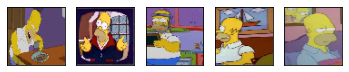

Augmented images...


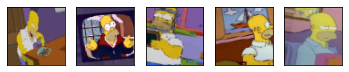

In [15]:
# Validate the augmentation is working
print("Original images...")
fig, ax = plt.subplots(1,5)
for i, ax in enumerate(ax.flatten()):
  ax.imshow(train_dataset[i])
  ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

augmented_images = next(input_datagen.flow(train_dataset, batch_size=5, shuffle=False))
print("Augmented images...")
fig, ax = plt.subplots(1,5)
for i, ax in enumerate(ax.flatten()):
  ax.imshow(augmented_images[i])
  ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

In [16]:
# Create two separate generators and then zip them together
input_generator = input_datagen.flow(train_dataset, batch_size=128, shuffle=True, seed=0)
output_generator = output_datagen.flow(train_dataset, batch_size=128, shuffle=True, seed=0)
train_generator = zip(input_generator, output_generator)

In [38]:
# Create model
def ae_model(input_size=(64, 64, 3)):
  return Sequential([
    Conv2D(32, (3,3), padding='same', activation="relu", input_shape=input_size),
    Conv2D(32, (3,3), padding='same', activation="relu"),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation="relu"),
    Conv2D(64, (3,3), padding='same', activation="relu"),
    MaxPooling2D(),
    Reshape((256, 64)),
    Dense(1024, activation="relu"),
    Dense(256, activation="relu"),
    Reshape((16, 16, 256)),
    Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', activation="relu"),
    Conv2D(64, (3,3), padding='same', activation="relu"),
    Conv2D(64, (3,3), padding='same', activation="relu"),
    Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', activation="relu"),
    Conv2D(32, (3,3), padding='same', activation="relu"),
    Conv2D(32, (3,3), padding='same', activation="relu"),
    Conv2D(3, (3,3), padding='same', activation="relu"),
  ])

model = ae_model(input_size=(64, 64, 3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 256, 64)          

In [39]:
# Compile model
model.compile(optimizer="Adam", loss="mae", metrics=["mse"])

## Training and evaluation 
  * Train the model on the augmented data for 200 epochs without early stopping.
  * Plot the training curve (train/validation loss and mse).
  * Evaluate the trained model on the test set.
  * Plot some (5) reconstruction examples. (Input and prediction pairs.)
  * Calculate the mean and the std of the MAE loss on the validation dataset, then set the classification threshold to the following: `<thrs> = <mean> + 0.5*<std>`
  * Evaluate the classification performance on the test set.
  * And finally evaluate the classification performance on the Flowers dataset. 

In [40]:
history = model.fit(
    train_generator,
    epochs=200,
    steps_per_epoch=len(train_dataset) // 128,
    validation_data=(val_dataset, val_dataset))

Epoch 1/200
10/10 [==============================] - 4s 443ms/step - loss: 0.3295 - mse: 0.1658 - val_loss: 0.2969 - val_mse: 0.1293
Epoch 2/200
10/10 [==============================] - 4s 395ms/step - loss: 0.2264 - mse: 0.0788 - val_loss: 0.2095 - val_mse: 0.0645
Epoch 3/200
10/10 [==============================] - 4s 405ms/step - loss: 0.1797 - mse: 0.0491 - val_loss: 0.1809 - val_mse: 0.0481
Epoch 4/200
10/10 [==============================] - 4s 395ms/step - loss: 0.1599 - mse: 0.0396 - val_loss: 0.1577 - val_mse: 0.0398
Epoch 5/200
10/10 [==============================] - 4s 390ms/step - loss: 0.1430 - mse: 0.0337 - val_loss: 0.1491 - val_mse: 0.0370
Epoch 6/200
10/10 [==============================] - 4s 393ms/step - loss: 0.1363 - mse: 0.0313 - val_loss: 0.1426 - val_mse: 0.0353
Epoch 7/200
10/10 [==============================] - 4s 390ms/step - loss: 0.1300 - mse: 0.0299 - val_loss: 0.1399 - val_mse: 0.0336
Epoch 8/200
10/10 [==============================] - 4s 410ms/step - 

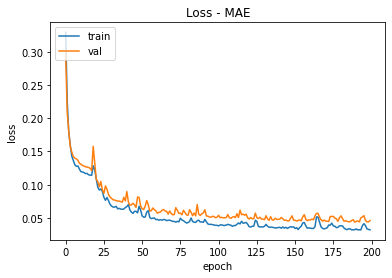

In [41]:
# Plot loss (MAE) during traing 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss - MAE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

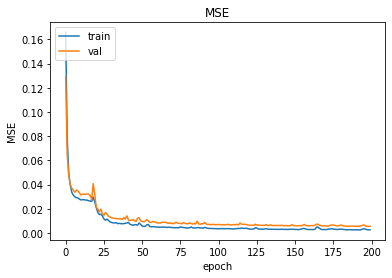

In [42]:
# Plot MSE during traing
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
# Evaluate on test set
results = model.evaluate(test_dataset, test_dataset)

15/15 [==============================] - 0s 28ms/step - loss: 0.0464 - mse: 0.0055


Input images...


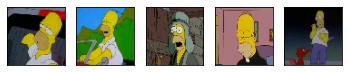

Reconstructions...


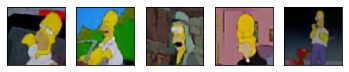

In [46]:
# Plot reconstruction examples
print("Input images...")
fig, ax = plt.subplots(1,5)
for i, ax in enumerate(ax.flatten()):
  ax.imshow(test_dataset[i])
  ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

predictions = model.predict(test_dataset[:5])
predictions[predictions > 1.0] = 1.0
print("Reconstructions...")
fig, ax = plt.subplots(1,5)
for i, ax in enumerate(ax.flatten()):
  ax.imshow(predictions[i])
  ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

In [59]:
# Calculate classification threshold
val_losses = []
for sample in val_dataset:
  sample = np.expand_dims(sample, axis=0)
  sample_results = model.evaluate(sample, sample, verbose=0)
  val_losses.append(sample_results[0])

thrs = np.mean(val_losses) + 0.5 * np.std(val_losses)

In [66]:
# Evaluate the classification performance on the test set
test_losses = []
for sample in test_dataset:
  sample = np.expand_dims(sample, axis=0)
  sample_results = model.evaluate(sample, sample, verbose=0)
  test_losses.append(sample_results[0])
test_losses = np.array(test_losses)

# 0 -> not homer / 1 -> homer
classifications = np.zeros_like(test_losses)
classifications[test_losses < thrs] = 1
print("Correctly classified test samples:", round(np.mean(classifications), 5))

Correctly classified test samples: 0.70667


In [67]:
# Evaluate the classification performance on the Flowers dataset
flowers_losses = []
for sample in flowers_dataset:
  sample = np.expand_dims(sample, axis=0)
  sample_results = model.evaluate(sample, sample, verbose=0)
  flowers_losses.append(sample_results[0])
flowers_losses = np.array(flowers_losses)

# 0 -> not homer / 1 -> homer
classifications = np.zeros_like(flowers_losses)
classifications[flowers_losses < thrs] = 1
print("Correctly classified flowers samples:", round(1 - np.mean(classifications), 5))

Correctly classified flowers samples: 0.57738
